<a href="https://colab.research.google.com/github/mjiii25/posco-academy/blob/main/Big-Data/Assignment-1/vitalfew-multi-linear-regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.feature_selection import RFE

from statsmodels.formula.api import ols
from statsmodels.api import qqplot, add_constant
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor

from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import r2_score

In [3]:
from google.colab import drive
drive.mount('/content/mydrive')

Mounted at /content/mydrive


### **데이터 구성하기**

In [16]:
df_raw = pd.read_excel('/content/mydrive/MyDrive/1. 실습데이터 설명(Data Dictionary).xlsx',
                       sheet_name = 'AIR_POLLUTION')

print(df_raw.shape)
df_raw.head(10)

(366, 15)


,MeasDate,PM10,PM25,O3,NO2,CO,SO2,TEMP,RAIN,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,SNOW,CLOUD
0,2019-07-01,29.0,20.0,0.054,0.021,0.5,0.003,24.034783,0.00,2.304348,249.130435,63.173913,995.073913,0.0,5.695652
1,2019-07-02,26.0,19.0,0.053,0.020,0.5,0.003,24.287500,0.00,2.258333,264.583333,63.166667,998.600000,0.0,3.833333
2,2019-07-03,30.0,20.0,0.042,0.023,0.4,0.003,24.175000,0.00,1.791667,280.000000,65.333333,998.270833,0.0,6.291667
3,2019-07-04,28.0,17.0,0.034,0.026,0.4,0.003,25.354167,0.00,2.037500,262.500000,58.625000,996.633333,0.0,2.541667
4,2019-07-05,29.0,19.0,0.045,0.035,0.5,0.003,27.295833,0.00,1.454167,175.416667,45.541667,993.537500,0.0,3.916667
5,2019-07-06,29.0,21.0,0.043,0.032,0.5,0.003,29.866667,0.00,1.541667,80.000000,39.708333,993.691667,0.0,3.500000
6,2019-07-07,16.0,12.0,0.043,0.014,0.3,0.002,26.858333,0.00,2.266667,82.916667,43.541667,997.450000,0.0,6.583333
7,2019-07-08,10.0,6.0,0.035,0.019,0.3,0.002,25.125000,0.00,1.962500,75.833333,45.333333,997.941667,0.0,6.583333
8,2019-07-09,10.0,6.0,0.033,0.019,0.4,0.002,25.112500,0.00,1.837500,81.250000,46.250000,996.712500,0.0,4.416667
9,2019-07-10,9.0,6.0,0.027,0.019,0.3,0.002,22.787500,0.82,2.125000,80.000000,61.000000,997.329167,0.0,8.291667


In [17]:
df_raw.drop(['MeasDate', 'PM25'], axis = 1, inplace = True)

In [18]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PM10       365 non-null    float64
 1   O3         365 non-null    float64
 2   NO2        365 non-null    float64
 3   CO         311 non-null    float64
 4   SO2        365 non-null    float64
 5   TEMP       366 non-null    float64
 6   RAIN       366 non-null    float64
 7   WIND       366 non-null    float64
 8   WIND_DIR   366 non-null    float64
 9   HUMIDITY   366 non-null    float64
 10  ATM_PRESS  366 non-null    float64
 11  SNOW       366 non-null    float64
 12  CLOUD      366 non-null    float64
dtypes: float64(13)
memory usage: 37.3 KB


In [19]:
df_raw.describe().round(3)

,PM10,O3,NO2,CO,SO2,TEMP,RAIN,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,SNOW,CLOUD
count,365.000,365.000,365.000,311.000,365.000,366.000,366.000,366.000,366.000,366.000,366.000,366.000,366.000
mean,33.422,0.024,0.027,0.517,0.003,13.863,0.382,2.225,209.420,60.292,1005.846,0.023,5.063
std,15.938,0.012,0.010,0.153,0.001,9.830,1.122,0.723,70.753,14.533,8.125,0.222,2.986
min,5.000,0.002,0.008,0.300,0.002,-7.954,0.000,0.942,50.000,17.875,983.800,0.000,0.000
25%,22.000,0.014,0.019,0.400,0.003,5.493,0.000,1.722,160.000,49.677,999.423,0.000,2.510
50%,31.000,0.023,0.025,0.500,0.003,13.996,0.000,2.094,221.042,61.062,1006.408,0.000,5.312
75%,42.000,0.032,0.034,0.600,0.003,23.073,0.115,2.620,265.833,69.917,1011.571,0.000,7.573
max,101.000,0.062,0.059,1.000,0.005,31.721,11.800,5.883,351.250,94.958,1025.529,3.188,10.000


**결측값 확인하기**

In [8]:
df_raw.isnull().sum()

MeasDate      0
PM10          1
O3            1
NO2           1
CO           55
SO2           1
TEMP          0
RAIN          0
WIND          0
WIND_DIR      0
HUMIDITY      0
ATM_PRESS     0
SNOW          0
CLOUD         0
dtype: int64

In [20]:
df_raw.fillna(df_raw.median(), inplace = True)
df_raw.head()

,PM10,O3,NO2,CO,SO2,TEMP,RAIN,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,SNOW,CLOUD
0,29.0,0.054,0.021,0.5,0.003,24.034783,0.0,2.304348,249.130435,63.173913,995.073913,0.0,5.695652
1,26.0,0.053,0.020,0.5,0.003,24.287500,0.0,2.258333,264.583333,63.166667,998.600000,0.0,3.833333
2,30.0,0.042,0.023,0.4,0.003,24.175000,0.0,1.791667,280.000000,65.333333,998.270833,0.0,6.291667
3,28.0,0.034,0.026,0.4,0.003,25.354167,0.0,2.037500,262.500000,58.625000,996.633333,0.0,2.541667
4,29.0,0.045,0.035,0.5,0.003,27.295833,0.0,1.454167,175.416667,45.541667,993.537500,0.0,3.916667


In [21]:
df_raw.isnull().sum()

PM10         0
O3           0
NO2          0
CO           0
SO2          0
TEMP         0
RAIN         0
WIND         0
WIND_DIR     0
HUMIDITY     0
ATM_PRESS    0
SNOW         0
CLOUD        0
dtype: int64

**데이터 분할하기**

In [22]:
df_train, df_test = train_test_split(df_raw,
                                     test_size = 0.3)

print('Shape of df_train : {}'.format(df_train.shape))
print('Shape of df_test : {}'.format(df_test.shape))

Shape of df_train : (256, 13)
Shape of df_test : (110, 13)


In [23]:
print(df_train.shape)
df_train.head()

(256, 13)


,PM10,O3,NO2,CO,SO2,TEMP,RAIN,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,SNOW,CLOUD
307,25.0,0.030,0.013,0.4,0.002,21.641667,0.00,1.958333,151.666667,69.750,996.129167,0.0,6.875000
142,20.0,0.014,0.030,0.5,0.003,0.466667,0.00,1.650000,231.666667,36.375,1020.670833,0.0,0.041667
76,14.0,0.029,0.014,0.5,0.002,24.091667,0.00,1.687500,298.750000,72.000,1000.845833,0.0,5.083333
109,18.0,0.015,0.034,0.4,0.003,16.862500,0.00,2.491667,290.000000,58.250,1012.195833,0.0,7.041667
339,45.0,0.036,0.017,0.4,0.002,21.908333,0.02,2.679167,266.250000,79.875,993.962500,0.0,8.041667


In [24]:
print(df_test.shape)
df_test.head()

(110, 13)


,PM10,O3,NO2,CO,SO2,TEMP,RAIN,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,SNOW,CLOUD
276,36.0,0.025,0.027,0.5,0.003,9.170833,0.0,2.279167,180.416667,42.666667,1011.375000,0.0,1.958333
188,52.0,0.006,0.047,0.9,0.004,1.175000,0.0,1.045833,155.833333,45.666667,1019.504167,0.0,3.625000
87,27.0,0.013,0.042,0.6,0.003,22.729167,0.0,1.708333,259.166667,59.625000,1013.495833,0.0,8.125000
86,27.0,0.019,0.043,0.6,0.004,20.766667,0.0,1.404167,264.583333,64.166667,1011.433333,0.0,5.416667
223,34.0,0.020,0.025,0.5,0.003,-0.645833,0.0,1.983333,265.833333,49.833333,1015.120833,0.0,1.083333


In [28]:
df_train.head()

,PM10,O3,NO2,CO,SO2,TEMP,RAIN,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,SNOW,CLOUD
307,25.0,0.030,0.013,0.4,0.002,21.641667,0.00,1.958333,151.666667,69.750,996.129167,0.0,6.875000
142,20.0,0.014,0.030,0.5,0.003,0.466667,0.00,1.650000,231.666667,36.375,1020.670833,0.0,0.041667
76,14.0,0.029,0.014,0.5,0.002,24.091667,0.00,1.687500,298.750000,72.000,1000.845833,0.0,5.083333
109,18.0,0.015,0.034,0.4,0.003,16.862500,0.00,2.491667,290.000000,58.250,1012.195833,0.0,7.041667
339,45.0,0.036,0.017,0.4,0.002,21.908333,0.02,2.679167,266.250000,79.875,993.962500,0.0,8.041667


### **변수 간 다중공선성 확인하기**

In [38]:
df_train_x = df_train.drop('PM10', axis = 1, inplace = False)
df_train_y = df_train['PM10']

In [39]:
df_train_x.head()

,O3,NO2,CO,SO2,TEMP,RAIN,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,SNOW,CLOUD
307,0.030,0.013,0.4,0.002,21.641667,0.00,1.958333,151.666667,69.750,996.129167,0.0,6.875000
142,0.014,0.030,0.5,0.003,0.466667,0.00,1.650000,231.666667,36.375,1020.670833,0.0,0.041667
76,0.029,0.014,0.5,0.002,24.091667,0.00,1.687500,298.750000,72.000,1000.845833,0.0,5.083333
109,0.015,0.034,0.4,0.003,16.862500,0.00,2.491667,290.000000,58.250,1012.195833,0.0,7.041667
339,0.036,0.017,0.4,0.002,21.908333,0.02,2.679167,266.250000,79.875,993.962500,0.0,8.041667


In [67]:
df_train_y.head()

307    25.0
142    20.0
76     14.0
109    18.0
339    45.0
Name: PM10, dtype: float64

In [71]:
df_train_x_const = add_constant(df_train_x)

df_vif = pd.DataFrame()
df_vif['variable'] = df_train_x_const.columns
df_vif['VIF'] = [variance_inflation_factor(df_train_x_const.values, i) for i in range(df_train_x_const.shape[1])]
df_vif.sort_values('VIF', ascending = False).round(3)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,variable,VIF
0,const,75737.876
2,NO2,5.192
10,ATM_PRESS,4.979
5,TEMP,4.507
3,CO,3.643
9,HUMIDITY,2.783
1,O3,2.760
12,CLOUD,2.210
4,SO2,2.033
7,WIND,1.938


- 설명변수 간 다중공선성은 확인되지 않는다.
- 무리없이 회귀분석을 진행해도 좋을 것으로 판단된다.

### **모델 생성하기 및 해석하기**

In [33]:
reg_model = smf.ols(formula = "PM10 ~ O3 + NO2 + CO + SO2 + TEMP + RAIN + WIND + WIND_DIR + HUMIDITY + ATM_PRESS + SNOW + CLOUD",
                    data = df_train)

reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                   PM10   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     23.31
Date:                Mon, 15 Aug 2022   Prob (F-statistic):           4.32e-34
Time:                        04:13:44   Log-Likelihood:                -961.92
No. Observations:                 256   AIC:                             1950.
Df Residuals:                     243   BIC:                             1996.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    357.7070    183.008      1.955      0.0

**<모델의 자유도 및 유의성 확인하기>**
- 해당 회귀모형은 총 256개의 관측값을 가지고 있으며, 잔차와 모델의 자유도는 각각 243개와 12개이다.
- F통계량 23.31에 대한 유의확률 = 4.32e-34 < 0.05이므로 모델이 유의하다는 결론을 내릴 수 있다.
- 이 모델의 수정결정계수는 0.512이며, 약 51.2%의 다소 약한 설명력을 갖는다.

**<회귀계수의 유의성 확인하기>**
- O3, NO2, CO, TEMP, WIND_DIR, ATM_PRESS의 t통계량은 각각 5.820, 3.079, 6.596, -4.353, 2.857, -2.117이다.
- 각각의 설명변수에 대한 유의확률 0.000, 0.002, 0.000, 0.000, 0.005, 0.035 < 0.05이므로 회귀계수의 유의성을 받아들일 수 있다.

### **모델 생성하기 및 해석하기 w/ scaling**

In [36]:
df_train.head()

,PM10,O3,NO2,CO,SO2,TEMP,RAIN,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,SNOW,CLOUD
307,25.0,0.030,0.013,0.4,0.002,21.641667,0.00,1.958333,151.666667,69.750,996.129167,0.0,6.875000
142,20.0,0.014,0.030,0.5,0.003,0.466667,0.00,1.650000,231.666667,36.375,1020.670833,0.0,0.041667
76,14.0,0.029,0.014,0.5,0.002,24.091667,0.00,1.687500,298.750000,72.000,1000.845833,0.0,5.083333
109,18.0,0.015,0.034,0.4,0.003,16.862500,0.00,2.491667,290.000000,58.250,1012.195833,0.0,7.041667
339,45.0,0.036,0.017,0.4,0.002,21.908333,0.02,2.679167,266.250000,79.875,993.962500,0.0,8.041667


In [46]:
scaler = StandardScaler()
df_train_x_scaled = scaler.fit_transform(df_train_x)

print(df_train_x_scaled.shape)
print(type(df_train_x_scaled))
df_train_x_scaled

(256, 12)
<class 'numpy.ndarray'>


array([[ 5.21376762e-01, -1.30553681e+00, -7.86186943e-01, ...,
        -1.14687352e+00, -1.16445375e-01,  5.98810765e-01],
       [-8.25129679e-01,  3.54806905e-01, -7.50072348e-02, ...,
         1.80887078e+00, -1.16445375e-01, -1.68016006e+00],
       [ 4.37220109e-01, -1.20786953e+00, -7.50072348e-02, ...,
        -5.78808577e-01, -1.16445375e-01,  1.27573165e-03],
       ...,
       [-1.07759964e+00,  1.72214879e+00,  1.34735218e+00, ...,
        -3.97650051e-01, -1.16445375e-01,  9.18422526e-01],
       [ 8.58003372e-01, -1.20786953e+00, -1.49736665e+00, ...,
        -2.09967818e-01, -1.16445375e-01,  1.52985372e+00],
       [ 6.89690067e-01,  5.50141460e-01, -7.50072348e-02, ...,
        -1.08565098e+00, -1.16445375e-01, -1.23789740e-01]])

In [63]:
df_train_x_scaled = pd.DataFrame(df_train_x_scaled, columns = df_train_x.columns)
df_train_x_scaled.index = df_train_x.index

print(df_train_x_scaled.shape)
df_train_x_scaled.head()

(256, 12)


,O3,NO2,CO,SO2,TEMP,RAIN,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,SNOW,CLOUD
307,0.521377,-1.305537,-0.786187,-1.562294,0.788661,-0.326210,-0.373910,-0.792838,0.628160,-1.146874,-0.116445,0.598811
142,-0.825130,0.354807,-0.075007,-0.035778,-1.338089,-0.326210,-0.797766,0.316031,-1.662743,1.808871,-0.116445,-1.680160
76,0.437220,-1.207870,-0.075007,-1.562294,1.034731,-0.326210,-0.746216,1.245863,0.782603,-0.578809,-0.116445,0.001276
109,-0.740973,0.745476,-0.786187,-0.035778,0.308656,-0.326210,0.359246,1.124581,-0.161215,0.788160,-0.116445,0.654395
339,1.026317,-0.914868,-0.786187,-1.562294,0.815444,-0.309976,0.616996,0.795385,1.323153,-1.407822,-0.116445,0.987903


In [66]:
df_train_scaled = pd.concat([df_train_y, df_train_x_scaled], axis = 1)
df_train_scaled.head()

,PM10,O3,NO2,CO,SO2,TEMP,RAIN,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,SNOW,CLOUD
307,25.0,0.521377,-1.305537,-0.786187,-1.562294,0.788661,-0.326210,-0.373910,-0.792838,0.628160,-1.146874,-0.116445,0.598811
142,20.0,-0.825130,0.354807,-0.075007,-0.035778,-1.338089,-0.326210,-0.797766,0.316031,-1.662743,1.808871,-0.116445,-1.680160
76,14.0,0.437220,-1.207870,-0.075007,-1.562294,1.034731,-0.326210,-0.746216,1.245863,0.782603,-0.578809,-0.116445,0.001276
109,18.0,-0.740973,0.745476,-0.786187,-0.035778,0.308656,-0.326210,0.359246,1.124581,-0.161215,0.788160,-0.116445,0.654395
339,45.0,1.026317,-0.914868,-0.786187,-1.562294,0.815444,-0.309976,0.616996,0.795385,1.323153,-1.407822,-0.116445,0.987903


In [68]:
reg_scaled_model = smf.ols(formula = "PM10 ~ O3 + NO2 + CO + SO2 + TEMP + RAIN + WIND + WIND_DIR + HUMIDITY + ATM_PRESS + SNOW + CLOUD",
                           data = df_train)

reg_scaled_result = reg_scaled_model.fit()
print(reg_scaled_result.summary())

                            OLS Regression Results                            
Dep. Variable:                   PM10   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     23.31
Date:                Mon, 15 Aug 2022   Prob (F-statistic):           4.32e-34
Time:                        04:45:03   Log-Likelihood:                -961.92
No. Observations:                 256   AIC:                             1950.
Df Residuals:                     243   BIC:                             1996.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    357.7070    183.008      1.955      0.0

**<모델의 자유도 및 유의성 확인하기>**
- 해당 회귀모형은 총 256개의 관측값을 가지고 있으며, 잔차와 모델의 자유도는 각각 243개와 12개이다.
- F통계량 23.31에 대한 유의확률 = 4.32e-34 < 0.05이므로 모델이 유의하다는 결론을 내릴 수 있다.
- 이 모델의 수정결정계수는 0.512이며, 약 51.2%의 다소 약한 설명력을 갖는다.

**<회귀계수의 유의성 확인하기>**
- O3, NO2, CO, TEMP, WIND_DIR, ATM_PRESS의 t통계량은 각각 5.820, 3.079, 6.596, -4.353, 2.857, -2.117이다.
- 각각의 설명변수에 대한 유의확률 0.000, 0.002, 0.000, 0.000, 0.005, 0.035 < 0.05이므로 회귀계수의 유의성을 받아들일 수 있다.

### **잔차의 가정 확인하기**

**등분산성**

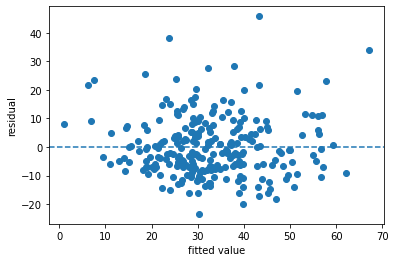

In [72]:
plt.scatter(reg_scaled_result.fittedvalues, reg_scaled_result.resid)
plt.xlabel('fitted value')
plt.ylabel('residual')
plt.axhline(y = 0, linestyle = '--')

- 잔차가 y=0을 기준으로 random하게 산포되어 있으므로 등분산성을 만족하는 것으로 볼 수 있다.

**독립성**

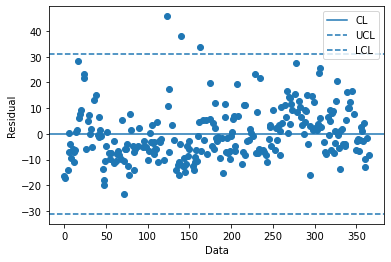

In [73]:
plt.scatter(df_train.index, reg_scaled_result.resid)
plt.xlabel('Data'); plt.ylabel('Residual')
plt.axhline(y = 0, linestyle = '-', label = 'CL')
plt.axhline(y = 3 * np.std(reg_scaled_result.resid), linestyle = '--', label = 'UCL')
plt.axhline(y = -3 * np.std(reg_scaled_result.resid), linestyle = '--', label = 'LCL')
plt.legend()

- 3개의 데이터가 관리상한선을 벗어나 분포되어 있다.
- 전반적으로 독립성을 만족하는 것으로 해석할 수 있다.

### **규제화 적용하기**

In [86]:
elastic = ElasticNet(alpha = 1,
                     l1_ratio = 0.5)
elastic.fit(df_train_x_scaled, df_train_y)
print('intercept : {}\n'.format(elastic.intercept_))

df_elastic_coef = pd.DataFrame({'Coef' : elastic.coef_},
                               index = df_train_x.columns)
df_elastic_coef.sort_values(by = 'Coef', ascending = False)

intercept : 32.640625



,Coef
CO,4.517786
SO2,1.938559
O3,1.725914
NO2,1.625055
WIND_DIR,0.626001
WIND,-0.000000
ATM_PRESS,0.000000
SNOW,0.000000
HUMIDITY,-0.042659
RAIN,-0.244778


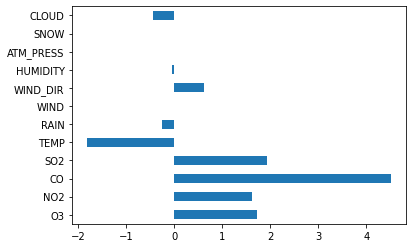

In [87]:
df_elastic_coef.plot.barh(y = 'Coef', legend = False)

- CO, SO2, O3, NO2는 PM10과 양의 인과관계를 가지며, TEMP의 경우 음의 인과관계를 갖는다.
- CO, SO2, O3, NO2의 농도가 높아질수록 & 온도가 낮아질수록 미세먼지의 농도가 높아진다는 것을 확인할 수 있다.